<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

***

# Supervised Machine Learning with Scikit-Learn

## (Regression: Hands-on Project)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Collection & Exploration

### 1.1 Built-in Data Sets

In [2]:
from sklearn import datasets # To work on built-in data sets in sklearn, first we need to import datasets module

In [3]:
dsets = dir(datasets) # dir () to see available libraries/datasets/modules within the datasets module
dsets

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2'

In [4]:
[d for d in dsets if 'load_' in d] #lets take a closer look at the some of the simple data sets that we can play with

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

In [5]:
# List comprehensions are better with a single line of code

In [6]:
# or We can just see what methods are available in this module directly with 'datasets'.Tab

In [7]:
for d in dsets:
    if 'load_' in d:
        print (d)

load_boston
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_mlcomp
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


#### Let's Load the diabetes dataset

In [8]:
diabetes = datasets.load_diabetes() # Load diabetes() dataset. 

#### Explore the data set

In [9]:
diabetes.keys() # This data set is stored as a dictionary like module. So, lets see the keys for this.

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [10]:
diabetes.values() # To see the values in this dictionary like object

dict_values([array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       1

In [11]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [12]:
diabetes['data'] # Lets take a peek inside the 'data' key

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [13]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [14]:
type(diabetes['data']) # Lets see the type of this diabetes data 

numpy.ndarray

In [15]:
diabetes['data'].shape # Lets see the shape of this data.

(442, 10)

In [16]:
diabetes['data'][0,:] # Lets see the first row and all columns

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [17]:
diabetes['feature_names'] # Lets look at the feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
diabetes['DESCR'] # Taking a peek at the DESCR key.

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.ht

In [19]:
type(diabetes['DESCR']) # What is the type of this?

str

In [20]:
diabetes['DESCR'].split('\n')

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - Age',
 '      - Sex',
 '      - Body mass index',
 '      - Average blood pressure',
 '      - S1',
 '      - S2',
 '      - S3',
 '      - S4',
 '      - S5',
 '      - S6',
 '',
 'Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of ea

***Q. Is there a better way to see this**

In [21]:
print (diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

**Lets Convert the diabetes['data'] into a data frame, and look at it**

In [22]:
X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
X.head() # Looks like this data is already normalized.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### 1.2 Load the Original Diabetes DataSet

In [23]:
# We want to take a look at data which was not normalized, just to get a feel for the actual data values

In [24]:
diabetes_orig = pd.read_csv('diabetes.txt', sep = '\t') # Load the original diabetes data set
diabetes_orig.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


**What do column names S1 to S6 mean??**

In [25]:
# We can do some reasearch and find out

**Change the column names S1 to S6 to more meaningful ones, based on our research**

In [26]:
diabetes_orig.columns = ['AGE', 'SEX', 'BMI', 'BP', 'TCOL', 'LDL', 'HDL', 'TCOL/HDL', 'LTG', 'GLU', 'Diab_Progression']
diabetes_orig.head()

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU,Diab_Progression
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## 2. Data Exploration & Visualization

**Q. Check to see if there are any missing (Nan) values**

In [27]:
diabetes_orig.isnull()

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU,Diab_Progression
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [28]:
diabetes_orig.isnull().sum(0)

AGE                 0
SEX                 0
BMI                 0
BP                  0
TCOL                0
LDL                 0
HDL                 0
TCOL/HDL            0
LTG                 0
GLU                 0
Diab_Progression    0
dtype: int64

**Q. How to get Get some basic information on the dataset?**

In [29]:
diabetes_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE                 442 non-null int64
SEX                 442 non-null int64
BMI                 442 non-null float64
BP                  442 non-null float64
TCOL                442 non-null int64
LDL                 442 non-null float64
HDL                 442 non-null float64
TCOL/HDL            442 non-null float64
LTG                 442 non-null float64
GLU                 442 non-null int64
Diab_Progression    442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [30]:
diabetes_orig.shape

(442, 11)

**Q. Waht about Statisics on numerical variables?**

In [31]:
diabetes_orig.describe()

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU,Diab_Progression
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### 2.1 Simple plots with matplotlib

**Plot between BMI and BP**

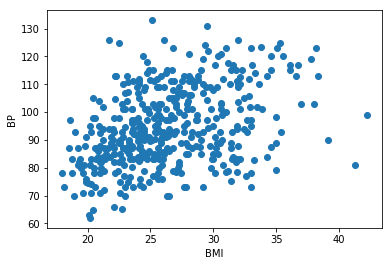

In [32]:
fig = plt.figure()

plt.plot(diabetes_orig['BMI'],diabetes_orig['BP'],'o')
plt.xlabel('BMI')
plt.ylabel('BP')

plt.show()

# plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12) - for more options
# fig.figsave('file name.jpg') - to save the figure.

**What about TCOL and BP?**

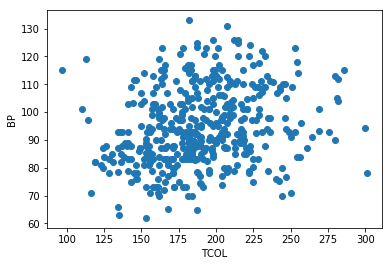

In [33]:
plt.plot(diabetes_orig['TCOL'],diabetes_orig['BP'],'o')
plt.xlabel('TCOL')
plt.ylabel('BP')
plt.show()

**We can plot target variable 'Y' (which is a measure of disease progression) with other independent variables**

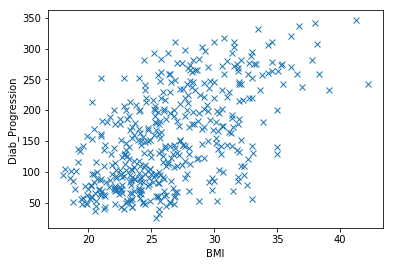

In [34]:
plt.plot(diabetes_orig['BMI'], diabetes_orig['Diab_Progression'], 'x')
plt.xlabel('BMI')
plt.ylabel('Diab_Progression')
plt.show()

### 2.2 Plotting with seaborn

**distplot (for histograms)**

C:\Users\palle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


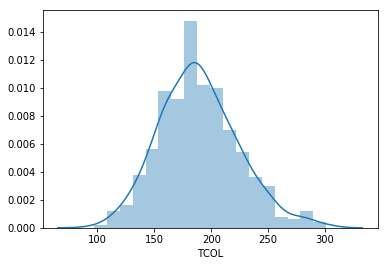

In [35]:
sns.distplot(diabetes_orig['TCOL'])
plt.show()

**sns.boxplot**

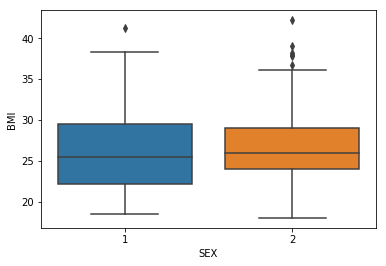

In [36]:
sns.boxplot(diabetes_orig['SEX'],diabetes_orig['BMI'])
plt.show()

In [37]:
diabetes_orig.groupby('SEX')['BMI'].mean()

SEX
1    26.010638
2    26.790338
Name: BMI, dtype: float64

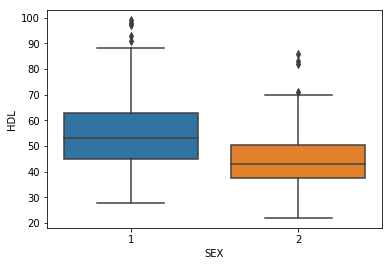

In [45]:
sns.boxplot(diabetes_orig['SEX'],diabetes_orig['HDL'])
plt.show()


**sns.jointplot** 

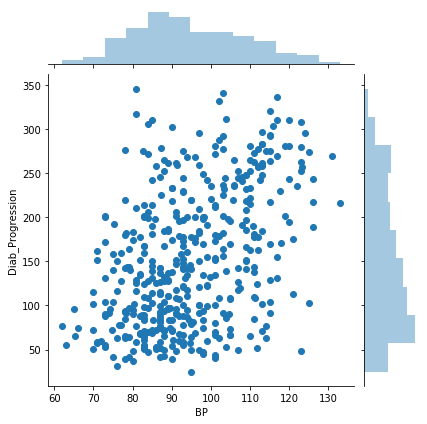

In [46]:
sns.jointplot(diabetes_orig['BP'],diabetes_orig['Diab_Progression']) # Both scatter and histograms
plt.show()

**sns.pairplot**

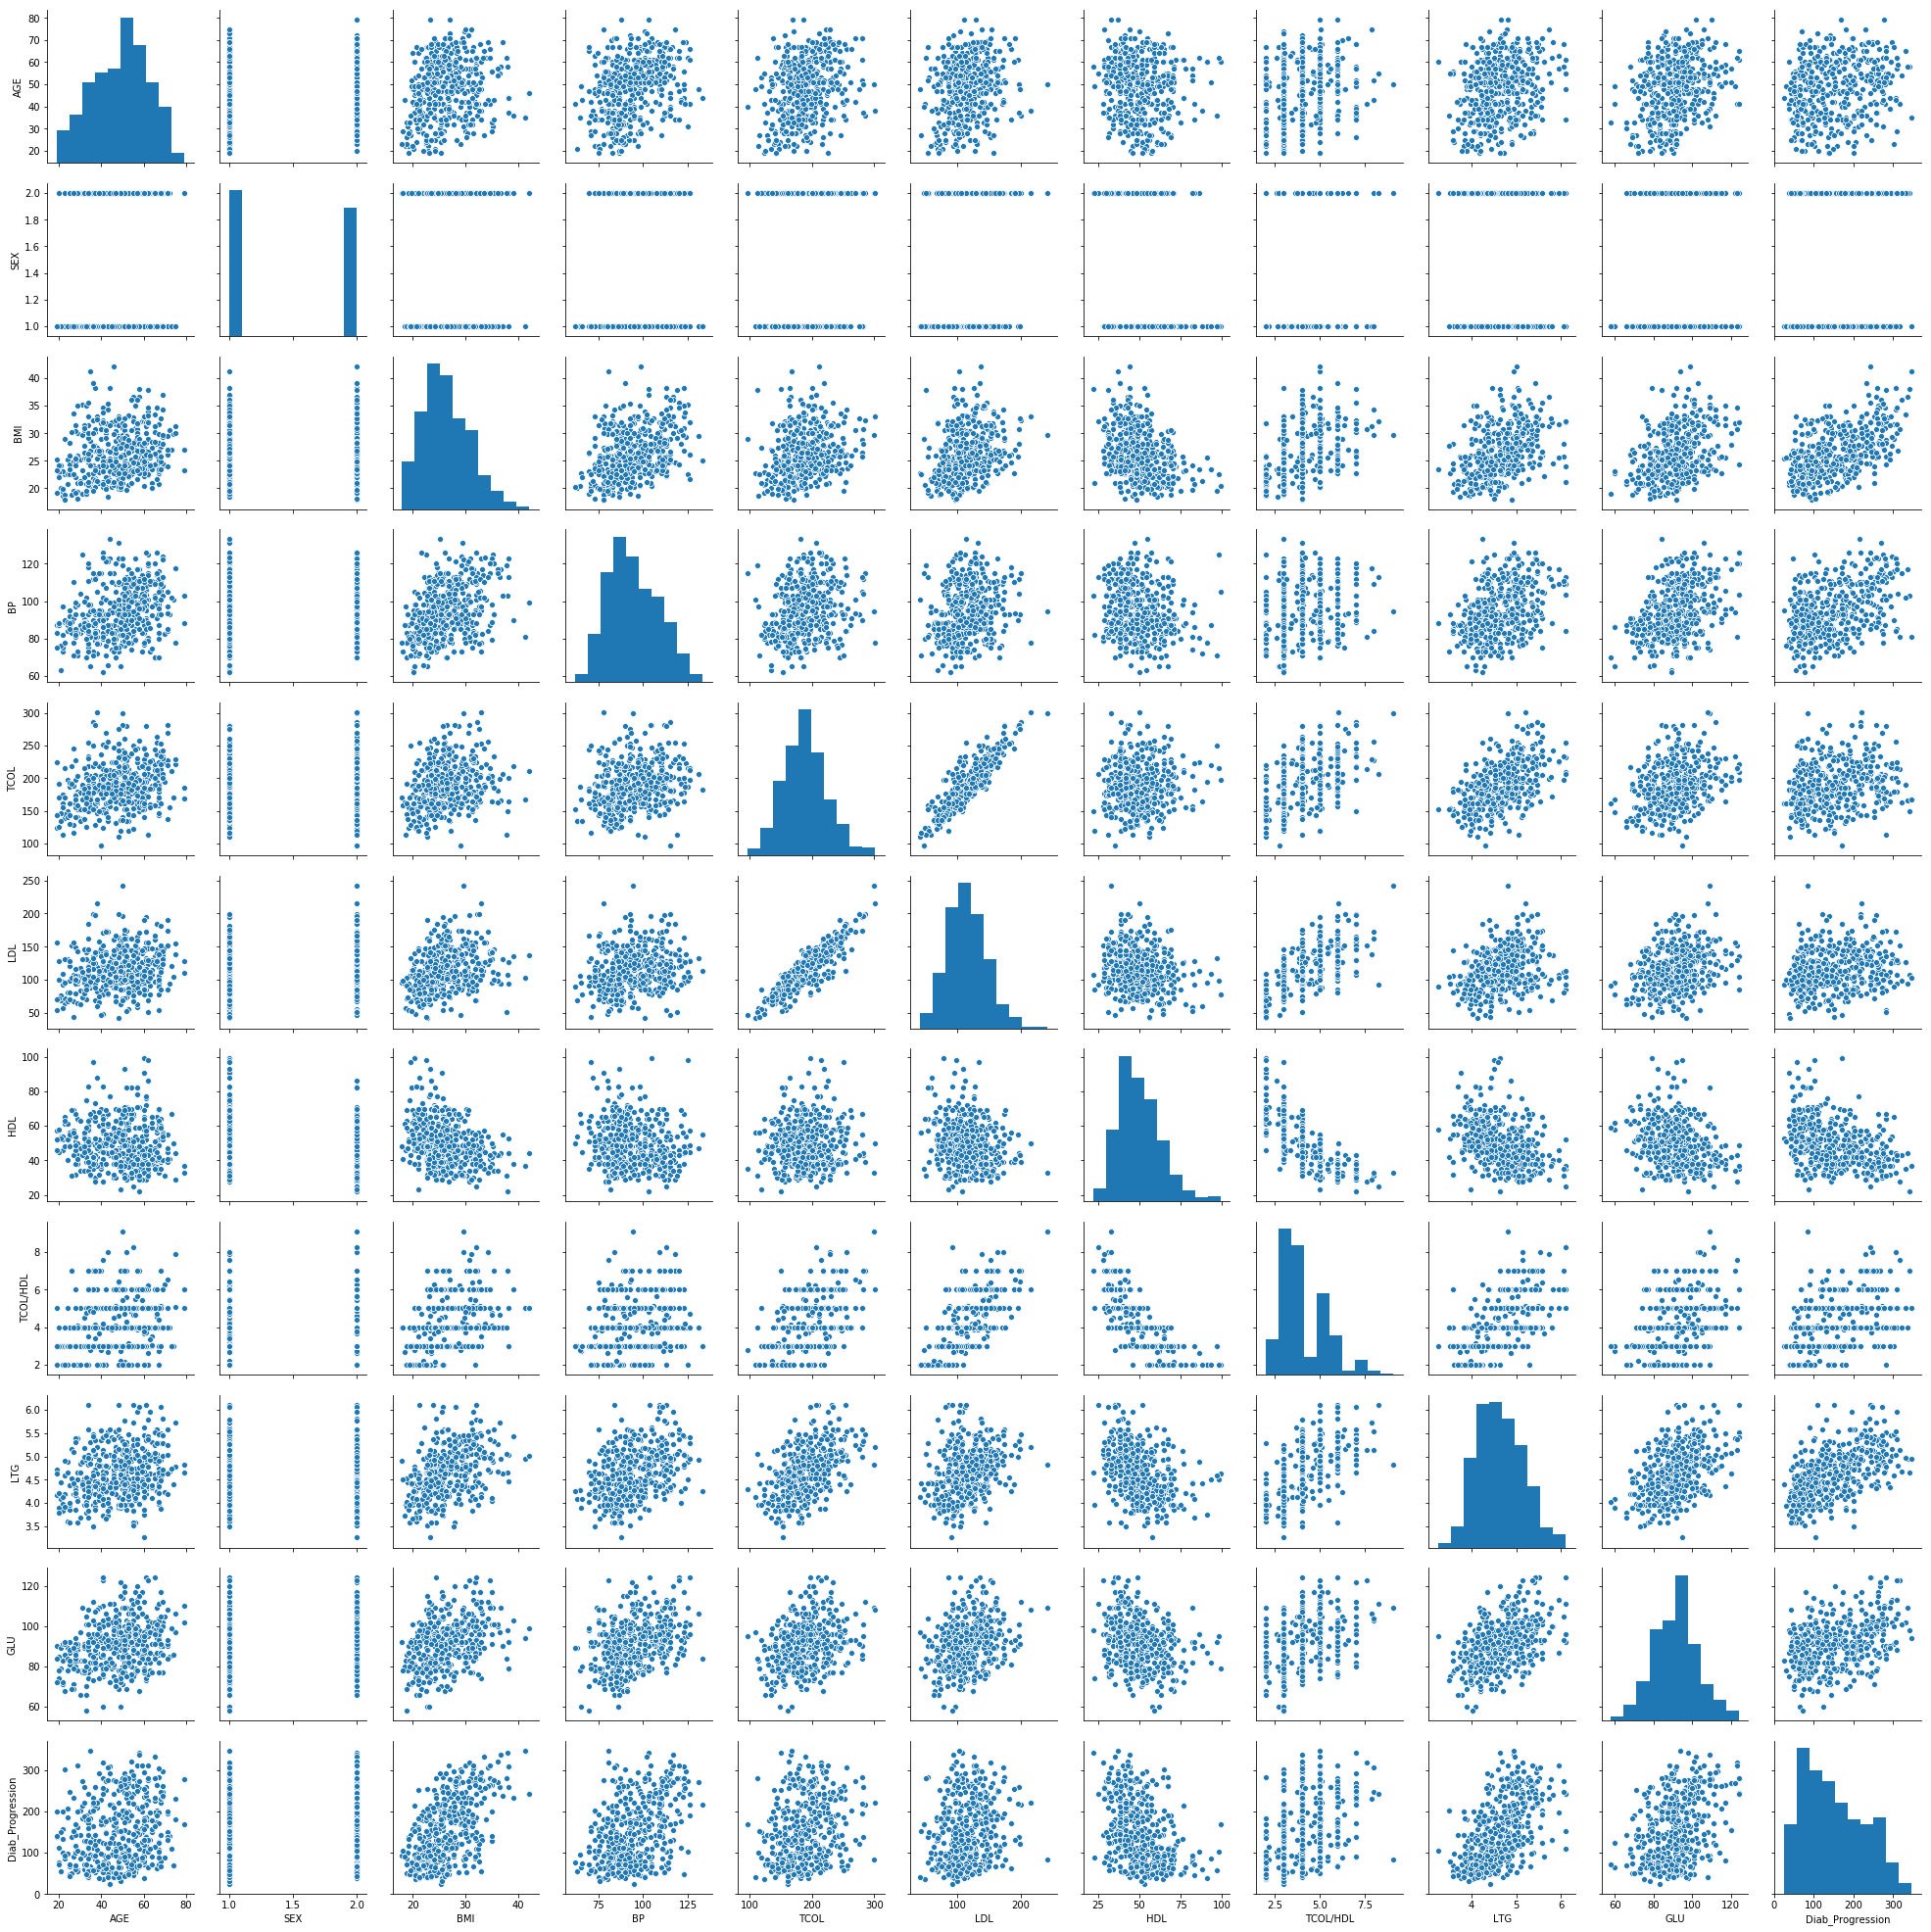

In [47]:
sns.pairplot(diabetes_orig)
plt.show()

**Correlation Matrix, using heatmap**

In [48]:
corm = diabetes_orig.corr()  #.corr() method will give us a correlation matrix
corm

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU,Diab_Progression
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
TCOL,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
LDL,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
HDL,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
TCOL/HDL,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
LTG,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
GLU,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


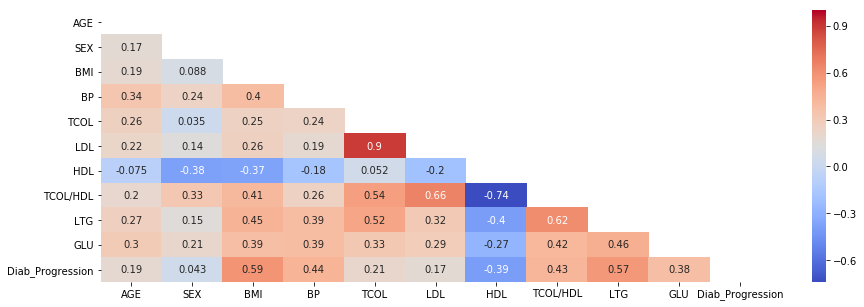

In [49]:
masko = np.zeros_like(corm, dtype=np.bool)
masko[np.triu_indices_from(masko)] = True

fig, axes = plt.subplots(figsize=(15, 5))
sns.heatmap(corm, mask = masko, cmap='coolwarm', annot=True)
plt.show()

**for more information on visualization please see matplotlib and seaborn official documentation pages**

**https://matplotlib.org/tutorials/index.html**

**https://seaborn.pydata.org/tutorial.html**

## 3. Data Clean-Up

In [50]:
# diabetes = diabetes_orig.drop('TCOL/HDL',1)
# diabetes.head(2)

## 4. Train/Test Split

**Put all the data related to independent variables into X, and target variable into y**

In [51]:
diabetes_orig.head(3)

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU,Diab_Progression
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141


In [52]:
diabetes_orig.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'TCOL', 'LDL', 'HDL', 'TCOL/HDL', 'LTG',
       'GLU', 'Diab_Progression'],
      dtype='object')

In [53]:
X = diabetes_orig.iloc[:,:-1] # Independent Variables
y = diabetes_orig.iloc[:,-1] # Dependent Variable
X.head(3)

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85


In [54]:
y.head(3) # Diab_Progression which is our target variable is now just 'y'

0    151
1     75
2    141
Name: Diab_Progression, dtype: int64

### 4.1 Perform the train/test split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)  
# default split is 0.25, but can be changed through test_size = argument.

In [83]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [84]:
X_train.head(3)

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU
252,50,1,31.9,78.33,207,149.2,38.0,5.45,4.5951,84
416,41,1,33.8,123.33,187,127.0,45.0,4.16,4.3175,100
418,51,1,24.1,87.00,261,175.6,69.0,4.00,4.4067,93


In [85]:
X_test.head(3)

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU
119,53,1,22.0,94.0,175,88.0,59.0,3.0,4.9416,98
207,51,1,30.6,103.0,198,106.6,57.0,3.0,5.1475,100
236,56,1,27.0,105.0,247,160.6,54.0,5.0,5.0876,94


### 4.2 Let's Normalize the data set

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

C:\Users\palle\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\palle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\palle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


**When we normalize StandardScaler returns numpy arrays. So lets convert them back to data frames**

In [88]:
X_train = pd.DataFrame(X_train_scale, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)

In [89]:
X_train.head(3)

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU
252,0.100742,-0.958373,1.273634,-1.186721,0.512556,1.119287,-0.869954,1.024178,-0.107575,-0.644203
416,-0.586074,-0.958373,1.716078,2.106334,-0.082420,0.370497,-0.336474,0.036733,-0.629374,0.741877
418,0.177055,-0.958373,-0.542714,-0.552259,2.118990,2.009741,1.492598,-0.085740,-0.461707,0.135467


In [90]:
X_train.describe().round()

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU
count,353.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0
mean,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-2.0,-2.0,-3.0,-2.0,-2.0,-2.0,-3.0,-3.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0


In [91]:
X_test.head(3)

,AGE,SEX,BMI,BP,TCOL,LDL,HDL,TCOL/HDL,LTG,GLU
119,0.329680,-0.958373,-1.031731,-0.040006,-0.439406,-0.944946,0.730485,-0.851201,0.543735,0.568617
207,0.177055,-0.958373,0.970909,0.618605,0.244817,-0.317581,0.578062,-0.851201,0.930761,0.741877
236,0.558619,-0.958373,0.132595,0.764963,1.702507,1.503802,0.349428,0.679721,0.818169,0.222097


## 5. Apply a Machine Learning Model on the data

### 5.1 Train the data

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
lr.coef_ # get the model coefficients

array([ -0.1850394 , -10.74378586,  23.97110665,  15.4460079 ,
       -33.6348803 ,  19.07653925,   3.87696491,  10.51802947,
        34.1537076 ,   1.91366485])

In [94]:
lr.intercept_

152.91784702549575

In [95]:
dict(zip(X_train.columns, lr.coef_)) # pairing the coefficients with the column names

{'AGE': -0.18503940220810303,
 'SEX': -10.74378585756806,
 'BMI': 23.97110665268452,
 'BP': 15.446007895246119,
 'TCOL': -33.63488029673352,
 'LDL': 19.076539252524228,
 'HDL': 3.8769649104865884,
 'TCOL/HDL': 10.518029469175838,
 'LTG': 34.15370760470613,
 'GLU': 1.9136648504087361}

In [96]:
coef = pd.Series(lr.coef_, index = X_train.columns) # Create a series with column names as index and coefficients as values.
coef

AGE         -0.185039
SEX        -10.743786
BMI         23.971107
BP          15.446008
TCOL       -33.634880
LDL         19.076539
HDL          3.876965
TCOL/HDL    10.518029
LTG         34.153708
GLU          1.913665
dtype: float64

In [97]:
lr.intercept_ # to see the intercept

152.91784702549575

### 5.2 Make predictions & Calculate scores on train data

**Predictions**

In [98]:
ypred_train = lr.predict(X_train)
ypred_train[0:5]

array([182.00114938, 225.83967107,  98.08407368, 196.68941647,
       200.89532989])

**Scores**

In [99]:
r2 = r2_score(y_train, ypred_train)
ar2 = 1 - (1-r2)*float(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print ('R-Sq score on train data is: ', r2)
print ('Adjusted Rsq score on train data is: ', ar2)
print ('Mean Squared error on train data is: ', mean_squared_error(y_train,ypred_train))


R-Sq score on train data is:  0.5122948233206475
Adjusted Rsq score on train data is:  0.49803443803762537
Mean Squared error on train data is:  2851.0368936259233


### 5.3 Make predictions on test data

**Predictions**

In [100]:
ypred_test = lr.predict(X_test)
ypred_test[0:5]

array([148.09458516, 208.21448655, 186.40135524,  82.48965216,
       163.39653073])

**Calculate score on test data**

In [101]:
r2_test = r2_score(y_test, ypred_test)
ar2_test = 1 - (1-r2_test)*float(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print ('R-Sq score on test data is: ', r2_test)
print ('Adjusted R2score on test data is: ', ar2_test)
print ('Mean Squared error on test data is: ', mean_squared_error(y_test,ypred_test))

R-Sq score on test data is:  0.5341988244945842
Adjusted R2score on test data is:  0.47448072507081296
Mean Squared error on test data is:  2911.8118861191774


**Plot test set data predictions vs actual values**

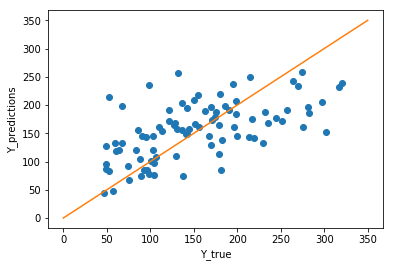

In [81]:
plt.plot(y_test,ypred_test, 'o')
plt.xlabel('Y_true')
plt.ylabel('Y_predictions')
x = np.linspace(0,350,100)
plt.plot(x,x)
plt.show()

## 6. Reporting the scores based on k-fold cross validation

In [105]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr,X,y,cv=15).mean()

0.45760877719286347

## 7. Fine tune the model with various options including feature engineering

### 7.1 Step wise feature selection

In [106]:
scoef = list(abs(coef).sort_values(ascending = False).index)
scoef

['LTG', 'TCOL', 'BMI', 'LDL', 'BP', 'SEX', 'TCOL/HDL', 'HDL', 'GLU', 'AGE']

In [107]:
Xc = X_train[scoef] # rearranged the columns
Xc.head()

,LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL,GLU,AGE
252,-0.107575,0.512556,1.273634,1.119287,-1.186721,-0.958373,1.024178,-0.869954,-0.644203,0.100742
416,-0.629374,-0.082420,1.716078,0.370497,2.106334,-0.958373,0.036733,-0.336474,0.741877,-0.586074
418,-0.461707,2.118990,-0.542714,2.009741,-0.552259,-0.958373,-0.085740,1.492598,0.135467,0.177055
163,-0.508135,-0.201415,1.553072,0.100662,1.643111,1.043435,-0.085740,-0.107840,1.261657,0.329680
253,0.698433,1.107531,0.714758,1.200238,0.179531,-0.958373,0.679721,-0.336474,1.434917,1.703312


In [108]:
col = []
scores = []
for i in Xc.columns:
    col.append(i)
    
    lm = LinearRegression()
    lm.fit(Xc[col], y_train)
    
    r2 = lm.score(Xc[col],y_train)
    ar2 = 1 - (1-r2)*float(len(y_train)-1)/(len(y_train)-Xc[col].shape[1]-1)
    
    score = [','.join(col), r2, ar2]
    
    scores.append(score) 

In [109]:
scores

[['LTG', 0.3137428214698815, 0.3117876728131006],
 ['LTG,TCOL', 0.3242562471979893, 0.32039485432483494],
 ['LTG,TCOL,BMI', 0.4628945800240105, 0.45827762798983296],
 ['LTG,TCOL,BMI,LDL', 0.4718804838434252, 0.46581014457725767],
 ['LTG,TCOL,BMI,LDL,BP', 0.49453540701476906, 0.48725205553083206],
 ['LTG,TCOL,BMI,LDL,BP,SEX', 0.5089308229852623, 0.5004151725167986],
 ['LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL', 0.5116874047422837, 0.5017796129544461],
 ['LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL',
  0.5118780169318156,
  0.5005263429069741],
 ['LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL,GLU',
  0.512290205171938,
  0.4994931551618722],
 ['LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL,GLU,AGE',
  0.5122948233206474,
  0.49803443803762537]]

In [110]:
step_scores = pd.DataFrame(scores, columns = ['Attributes', 'R-Sq', 'R-Sq(adj)'])
step_scores

,Attributes,R-Sq,R-Sq(adj)
0,LTG,0.313743,0.311788
1,"LTG,TCOL",0.324256,0.320395
2,"LTG,TCOL,BMI",0.462895,0.458278
3,"LTG,TCOL,BMI,LDL",0.471880,0.465810
4,"LTG,TCOL,BMI,LDL,BP",0.494535,0.487252
5,"LTG,TCOL,BMI,LDL,BP,SEX",0.508931,0.500415
6,"LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL",0.511687,0.501780
7,"LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL",0.511878,0.500526
8,"LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL,GLU",0.512290,0.499493
9,"LTG,TCOL,BMI,LDL,BP,SEX,TCOL/HDL,HDL,GLU,AGE",0.512295,0.498034


In [111]:
X_train.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'TCOL', 'LDL', 'HDL', 'TCOL/HDL', 'LTG',
       'GLU'],
      dtype='object')

### 7.2 Polynomial Features

In [112]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

lr_poly = LinearRegression()

lr_poly.fit(X_train_poly,y_train)
ypred_train_poly = lr_poly.predict(X_train_poly)
print ('R2 score for polynomial regression on training data is : ', r2_score(y_train,ypred_train_poly))
print ('Mean Squared Error for polynomial regression on training data is : ', mean_squared_error(y_train,ypred_train_poly))

R2 score for polynomial regression on training data is :  0.6158850812452674
Mean Squared Error for polynomial regression on training data is :  2245.4668458068677


In [113]:
ypred_test_poly = lr_poly.predict(X_test_poly) 
print ('R2 score for polynomial regression on test data is : ', r2_score(y_test,ypred_test_poly))
print ('Mean Squared Error for polynomial regression on test data is : ', mean_squared_error(y_test,ypred_test_poly))

R2 score for polynomial regression on test data is :  0.3932139278644995
Mean Squared Error for polynomial regression on test data is :  3793.1353334576897


In [ ]:
# Even though polynomial features increased training score, it didn't increase, it made it worse.

In [114]:
X_train_poly.shape

(353, 66)